In [17]:
import numpy as np
data_prop = []
with open("Main_part/data/exp1_dist/protocol_relocations/exp1_distance_honest_filedVictordd.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        # if float(datas[0]) > 0:
        data_prop.append(datas)

# Main_part\data\exp1_dist\protocol_relocations\exp1_distance_honest_filedVictordd.txt
print(data_prop)
# print(np.array(data, dtype=float).mean(axis = 0)[0])
# print(np.array(data, dtype=float).min(axis = 0)[0])
# print(np.array(data, dtype=float).max(axis = 0)[2])

[['hand', 'to', 'marker:', '0.095'], ['93.288', '0.439', 'x:-0.0095', 'y:-0.0716', 'z:0.4333', 'rx:0.3242', 'ry:', '-0.2267', 'rz:', '-1.2973'], ['93.321', '0.444', 'x:-0.0092', 'y:-0.0721', 'z:0.4381', 'rx:0.2996', 'ry:', '-0.1741', 'rz:', '-1.2947'], ['93.353', '0.441', 'x:-0.0088', 'y:-0.0715', 'z:0.4352', 'rx:0.3319', 'ry:', '-0.2068', 'rz:', '-1.2926'], ['116.017', '0.404', 'x:-0.0411', 'y:-0.0650', 'z:0.3968', 'rx:0.3845', 'ry:', '-0.2358', 'rz:', '-1.2411'], ['128.946', '0.448', 'x:-0.0461', 'y:-0.0376', 'z:0.4442', 'rx:0.4176', 'ry:', '-0.2629', 'rz:', '-1.3032'], ['128.979', '0.455', 'x:-0.0408', 'y:-0.0258', 'z:0.4522', 'rx:0.4656', 'ry:', '-0.2506', 'rz:', '-1.3324'], ['129.012', '0.466', 'x:-0.0340', 'y:-0.0093', 'z:0.4651', 'rx:0.4624', 'ry:', '-0.2485', 'rz:', '-1.3809'], ['145.946', '0.449', 'x:-0.0488', 'y:-0.0937', 'z:0.4365', 'rx:0.4799', 'ry:', '-0.2750', 'rz:', '-1.1020'], ['145.979', '0.447', 'x:-0.0490', 'y:-0.0990', 'z:0.4328', 'rx:0.4784', 'ry:', '-0.3034', 'rz:

In [110]:
import numpy as np
data_prop = []
data_vis = []

with open("Main_part/data/exp2/12thApril/Viktor_no_imp_last.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:  
            data_vis.append(datas) 

with open("Main_part/data/exp2/12thApril/Viktor_imp_last.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas) 

data_prop = np.array(data_prop, dtype=float)
data_vis = np.array(data_vis, dtype=float)

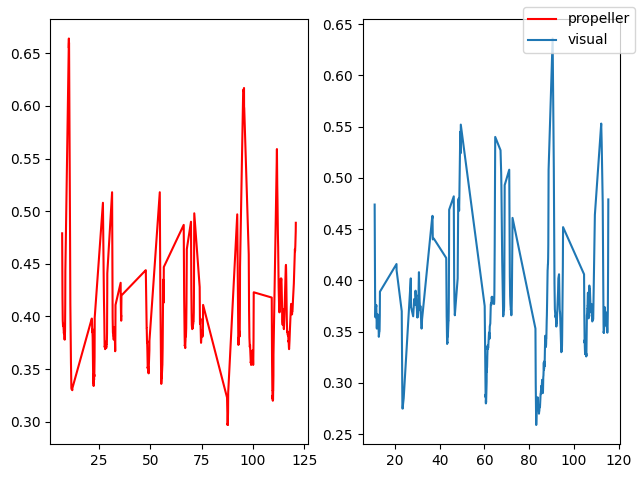

In [111]:
fig, ax = plt.subplots(1,2)
ax[0].plot(data_prop[:,2],data_prop[:,0],'r', label='propeller')
ax[1].plot(data_vis[:,2],data_vis[:,0], label='visual')
fig.tight_layout()
fig.legend()
plt.show()

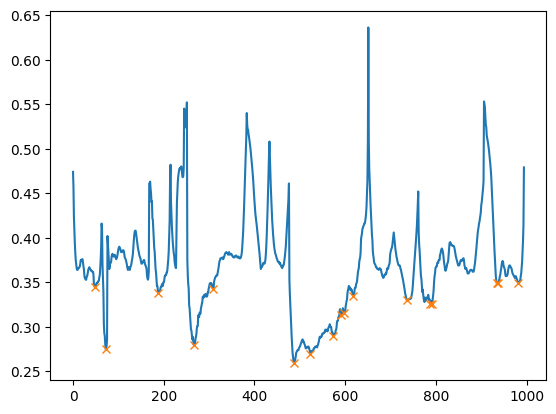

In [138]:
from scipy.signal import find_peaks
x = -data_vis[:,0]
peaks, _ = find_peaks(x, width = 3,height=-0.35) #prominence=(-0.5, -0.1) prominence=(-0.45, -0.25), 
x = data_vis[:,0]
# peaks, properties = find_peaks(x, prominence=(None, 0.6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

vis_peaks = x[peaks]

In [139]:
print(prop_peaks)
print(vis_peaks)

[0.33  0.334 0.346 0.336 0.297 0.297 0.32 ]
[0.345 0.275 0.338 0.28  0.343 0.259 0.27  0.29  0.313 0.316 0.335 0.33
 0.326 0.326 0.349 0.349 0.349]


0.4816619981325865
0.246
51.61


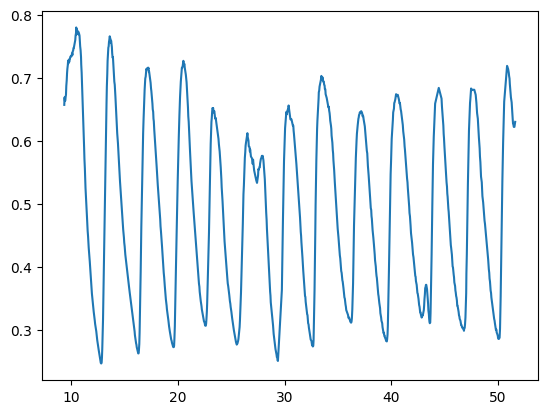

In [98]:
import numpy as np
data_prop = []
with open("data/reaction_time/exp1_reaction_Denis_Grankin.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data_prop.append(datas)

print(np.array(data_prop, dtype=float).mean(axis = 0)[0])
print(np.array(data_prop, dtype=float).min(axis = 0)[0])
print(np.array(data_prop, dtype=float).max(axis = 0)[2])
data_prop =  np.array(data_prop, dtype=float)
fig, ax = plt.subplots()
ax.plot(data_prop[:,2],data_prop[:,0])
plt.show()

(14, 2)


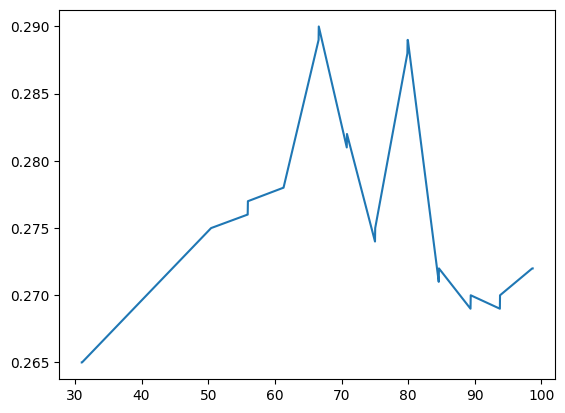

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
data = []
with open("data/distance_measurement/exp1_distance_Denis_Grankin_25.txt", "r") as my_file:
    for line in my_file:
        datas = line.split() 
        if float(datas[0]) > 0:
            data.append(datas)

data =  np.array(data, dtype=float)


threshold = 1
diff = np.empty(data.shape)

diff[0] = np.inf  # always retain the 1st element
diff[1:] = np.diff(data)

mask = diff > threshold

new_arr = data[mask]

mask = data[:,1] > 0.35
far = data[mask]
print(far.shape)
min_dt_dist = 1

close = data[~mask]
fig, ax = plt.subplots()
ax.plot(close[:,0],close[:,1])
plt.show()
# print(argrelextrema(data, np.less))

In [99]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = data[: ,0]
peaks, _ = find_peaks(x, height=-0.3)
# peaks, properties = find_peaks(x, prominence=(None, 0.6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

array([[ 0.657,  0.657,  9.36 ],
       [ 0.669,  0.805,  9.39 ],
       [ 0.663,  0.934,  9.42 ],
       ...,
       [ 0.622,  0.23 , 51.48 ],
       [ 0.622,  0.878, 51.54 ],
       [ 0.63 ,  1.991, 51.61 ]])

In [ ]:
from scipy.signal import argrelextrema
q = argrelextrema(data[:,0], np.less)

print(data[q ,0])

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
# from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = data[: ,0]
# peaks = scipy.signal.argrelmin(x,mode='wrap')
peaks, _ = find_peaks(data, height=0)
print(peaks)
plt.plot(x)
plt.plot(np.array(peaks).flatten(), -data[: ,0][peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.datasets import electrocardiogram
from scipy.signal import find_peaks
x = data[: ,0]
peaks, _ = find_peaks(x, height=-0.3)
# peaks, properties = find_peaks(x, prominence=(None, 0.6))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
data[q,0][mask]

In [48]:
mask = data[q,0] < 0.3
print(mask.shape)
print(data[q,0][mask.flatten()])

(1, 11)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 11